# K Means Clustering From Scratch

## Algorithm
1. Assign K-points as a center of clusters
2. Assign all points to the closest center
3. Recalculate the center
4. Repeat 2 and 3 until convergence

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
class Kmeanscluster:
    def __init__(self, X, k, max_iter=500, min_distance = 1e-4):
        # X: Data
        # k: number of clusters
        self.X = np.asarray(X)
        self.k = k
        # Maximum  Iteration
        self.max_iter = max_iter
        # Stopping condition: distance(center,new_center) <= min_distance: break the loop
        self.min_distance = min_distance
        
        # Define Dimensions
        self.num_entry = X.shape[0]
        self.dimension = X.shape[1]
    
    def initial_center(self):
        center = X[np.random.choice(self.num_entry, self.k, replace=False)]
        return center
    
    def assign_points(self, center):
        # Distance between two vectors
        def distance(a: np.ndarray, b: np.ndarray) -> float:
            dist = 0
            for i in range(len(a)):
                dist += (a[i]-b[i])**2
            return np.sqrt(dist)
    
        # Distance between entry vs center of each cluster
        def distance_center(entry, center):
            dist_center = list()
            for i in range(self.k):
                dist_center.append(distance(entry, center[i]))
            return np.asarray(dist_center)
        
        # Make Distance matrix for each entry to the center
        # Argmin will return the label
        label = list()
        for n in range(self.num_entry):
            label.append(np.argmin(distance_center(X[n],center)))
        return label
        
    def update_center(self, label):
        new_center = list()
        sums = np.zeros((self.k, self.dimension))
        counts = [0]*self.k
                
        for n in range(self.num_entry):
            # For each entry, check the label and update sums and counts
            sums[label[n]] += self.X[n]
            counts[label[n]] += 1
        
        for k in range(self.k):
            if counts[k] == 0:
                pass
            else:
                new_center.append(sums[k]/counts[k])
        return np.asarray(new_center)
        
    def fit(self):
        # Initialize condition
        center = self.initial_center()
        label = self.assign_points(center)
        new_center = self.update_center(label)
                
        i=0
        while i < self.max_iter and sum(np.ravel(center-new_center)**2)>self.min_distance:
            center = self.update_center(label)
            label = self.assign_points(center)
            i += 1
        return label
        
    def plot_result(self, label):
        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = prop_cycle.by_key()['color']
        
        plt.figure(figsize=(10,8))
        for n in range(self.num_entry):
            plt.scatter(self.X[n,0], self.X[n,1], color=colors[label[n]])
            plt.text(self.X[n,0], self.X[n,1], label[n])

## Test with small sample
Randomly generate 100 entries with 2 feature spaces. I used 2 as a feature dimension just for visuallization purpose, but the code should wor with higher feature dimensions.

Try to cluster the data with 3 groups

In [143]:
X = np.random.rand(100,2)

In [144]:
Kmeans = Kmeanscluster(X,k=3)

In [145]:
Kmeans.num_entry

100

In [146]:
Kmeans.dimension

2

### Plot the data before clustering

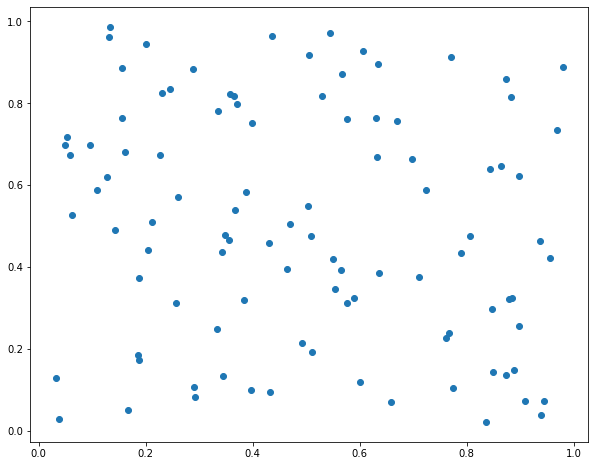

In [147]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])

### Plot the clustered data

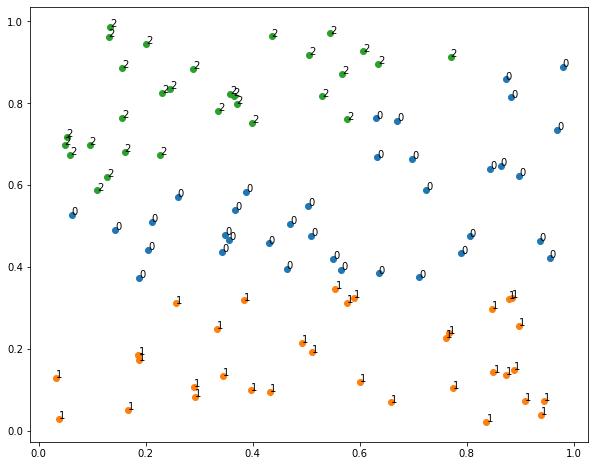

In [148]:
label = Kmeans.fit()
Kmeans.plot_result(label=label)

## Test again with Large and clustered sample
I will randomly generate 300 points with 3 distinct distribution and try to cluster them by 3 groups as previous.

In [173]:
X1 = np.random.normal(loc = [1,3], scale = 2, size=(100,2))
X2 = np.random.normal(loc = [11,7], scale = 2.5, size=(100,2))
X3 = np.random.normal(loc = [-3,11], scale = 0.9, size=(100,2))

In [174]:
X = np.vstack((X1,X2,X3))
X.shape

(300, 2)

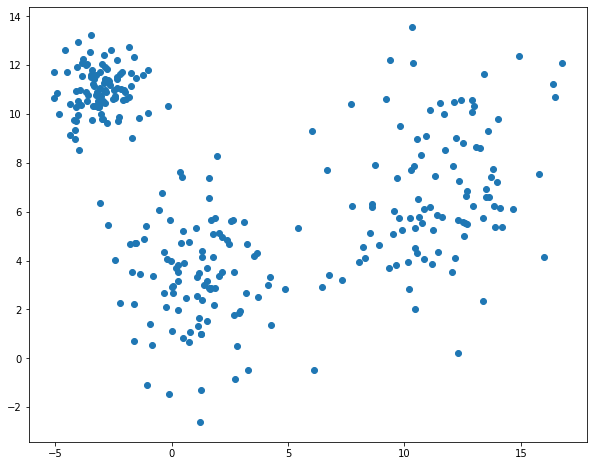

In [175]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])

In [176]:
Kmeans = Kmeanscluster(X,k=3)

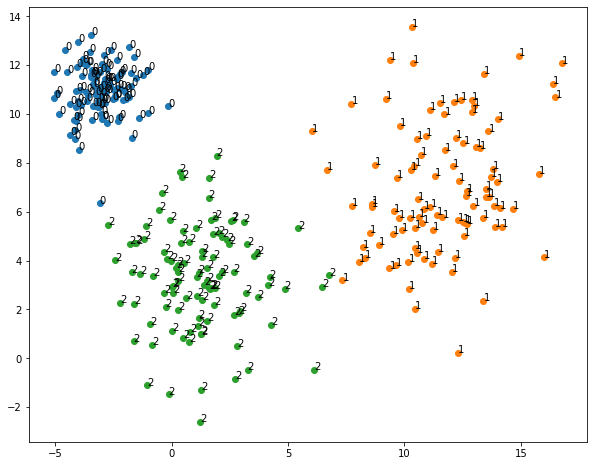

In [177]:
label = Kmeans.fit()
Kmeans.plot_result(label=label)